<a href="https://colab.research.google.com/github/ShreyaskarSingh/ML/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 7 is done at the end of this notebook**

## Task 2

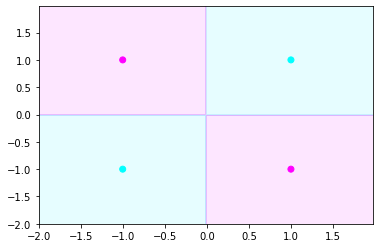

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets



X = np.array([[-1, -1],[-1, 1],[1, -1],[1, 1]])

y = np.array([0, 1, 1, 0])

h = .02 

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if clf != poly_svc:
        continue
    # plt.subplot(2, 2, i + 1)
    # plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.cool, alpha = 0.1)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cool)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    # plt.title(titles[i])

plt.show()

##Task 5

**Orignal Points figure**

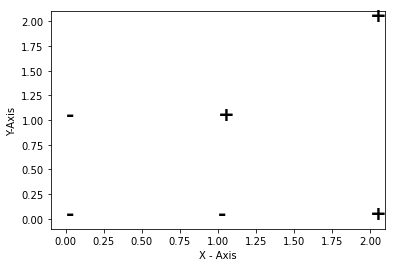

In [38]:
x = [1,2,2,0,1,0]
y = [1,2,0,0,0,1]
k = ['+','+','+','-','-','-']
import matplotlib.pyplot as plt
plt.scatter(x, y,color='white')
plt.xlabel('X - Axis')
plt.ylabel('Y-Axis')
for i, txt in enumerate(k):
    plt.annotate(txt, (x[i], y[i]),size = 20, weight = 'bold')

##Using SVM

0.0


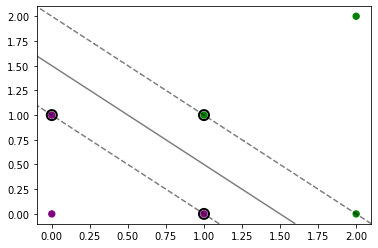

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X = np.array([[1, 1],[2, 2], [2, 0],[0, 0],[1, 0] , [0, 1]])

y = np.array([1, 1, 1, 0, 0, 0])

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=['green', 'green', 'green', 'purple', 'purple', 'purple'], s=40, cmap=plt.cm.Paired)


ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)


w = clf.coef_[0]
a = -w[0] / w[1]
print(clf.coef0)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=2, facecolors='none', edgecolors='k')
plt.show()

## Task 6

Text(0.5, 1.0, 'Green circle denotes +ve and Black circle denotes -ve')

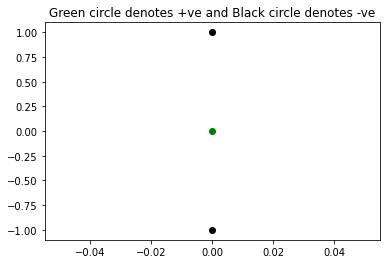

In [47]:
plt.plot([0],[0],'go')
plt.plot([0,0],[-1,+1],'ko')
plt.title('Green circle denotes +ve and Black circle denotes -ve')

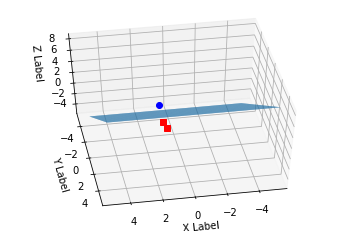

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets



X = np.array([[1, 0, 0],[1, -1*np.sqrt(2), 1], [1, np.sqrt(2), 1]])

Y = np.array([1, 0, 1])

X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')

clf = model.fit(X, Y)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(50, 80)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

## Titanic Dataset Preprocessing (previous Assignments)


In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import datetime
import warnings
warnings.filterwarnings('ignore')



In [ ]:
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

In [ ]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
training_data.isnull().mean()      # check the percentage of missing values per variable

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Text(0.5, 0, 'Age')

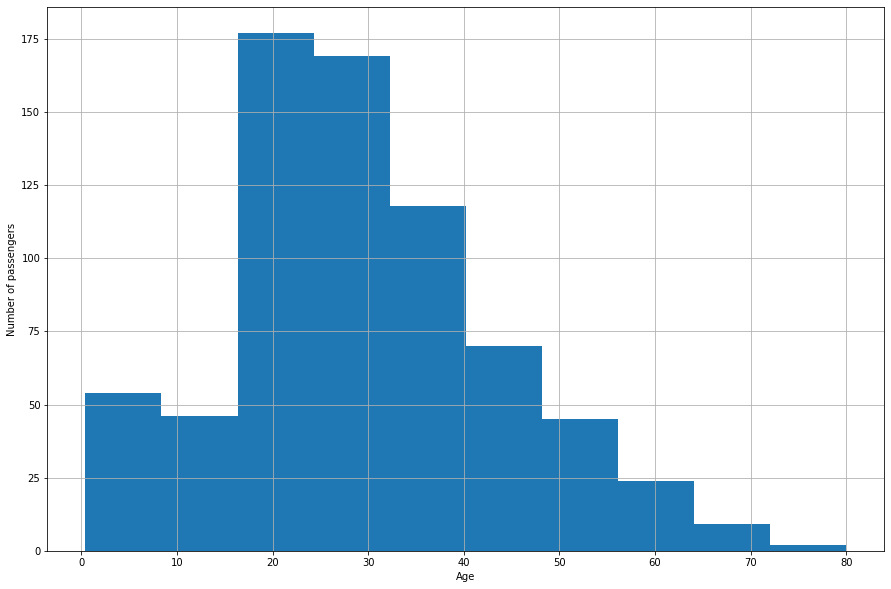

In [ ]:
plt.figure(figsize=(15,10))
fig = training_data.Age.hist(bins=10)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')

In [ ]:
training_data['Age'].fillna(training_data['Age'].median(), inplace = True)
testing_data['Age'].fillna(testing_data['Age'].median(), inplace=True)

In [ ]:
testing_data["Sex"]=pd.get_dummies(testing_data["Sex"])
training_data["Sex"]=pd.get_dummies(training_data["Sex"])

In [ ]:
training_data['Age'].isnull().sum() # checking for missing values in Age Column

0

In [ ]:
training_data['Fare'].isnull().sum()    # checking for missing values in Fare column

0

In [ ]:
combine=[training_data,testing_data]
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(training_data['Title'], training_data['Sex'])

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [ ]:
training_data['Age_bin'] = pd.cut(training_data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
testing_data['Age_bin'] = pd.cut(testing_data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [ ]:
training_data['Fare_bin'] = pd.cut(training_data['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])
testing_data['Fare_bin'] = pd.cut(testing_data['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])


In [ ]:
training_data = pd.get_dummies(training_data, columns = ["Age_bin","Embarked"],prefix=["Age_type","Em_type"])

In [ ]:
training_data = pd.get_dummies(training_data, columns = ["Fare_bin"],prefix=["Fare_type"])
testing_data = pd.get_dummies(testing_data, columns = ["Fare_bin"],prefix=["Fare_type"])

In [ ]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Age_type_Children,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1,0,0,0,1,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3,0,0,1,0,1,0,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,0,1,0,0,0,1,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3,0,0,1,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
training_data = training_data.drop(['Name','PassengerId','Cabin','Ticket'], axis=1)
testing_data = testing_data.drop(['Name','PassengerId','Cabin','Ticket'], axis=1)

In [ ]:
training_data = training_data.drop(['Fare','Age'], axis=1)
testing_data = testing_data.drop(['Fare','Age'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
f = training_data.drop("Survived",axis=1)
t = training_data["Survived"]
X_train,X_test,y_train,y_test = train_test_split(f,t,test_size=0.3,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 16), (268, 16), (623,), (268,))

The accuracy of the DecisionTree Classifier is 71.64
The cross validated score for Decision Tree classifier is: 79.46


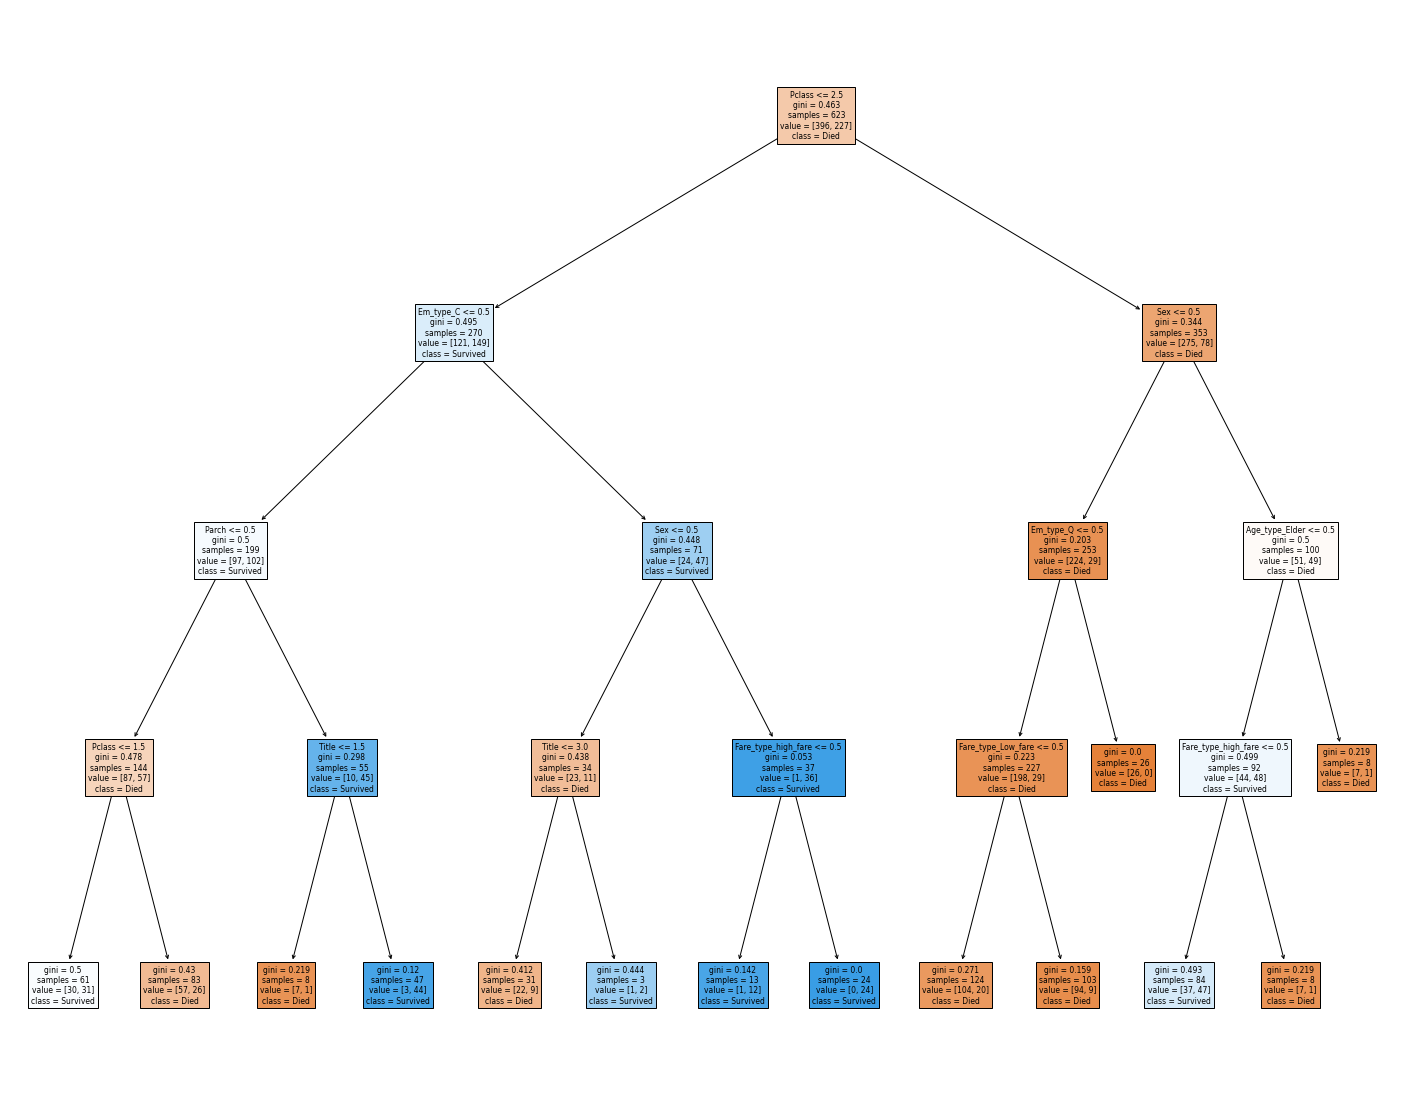

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model= DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=1,max_features='auto', max_depth= 4)
t1=model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))
kfold = KFold(n_splits=5, random_state=1)
result_tree=cross_val_score(model,f,t,cv=5,scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))
y_pred = cross_val_predict(model,f,t,cv=5)
fig = plt.figure(figsize =(25,20))
_ = tree.plot_tree(
    model,
    feature_names = list(training_data.drop(['Survived'], axis=1)),
    class_names = ['Died', 'Survived'],
    filled = True
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=1000,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('The Accuracy of the model')
print('The accuracy of the Random Forest Classifier is', round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=5, random_state=1)
result_rm=cross_val_score(model,f,t,cv=5,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,f,t,cv=5)

The Accuracy of the model
The accuracy of the Random Forest Classifier is 78.73
The cross validated score for Random Forest Classifier is: 82.6


## Task 7

In [ ]:
from sklearn import svm
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear')    # create the new kernel
clf.fit(X_train, y_train.ravel());
accuracy_score = cross_val_score(clf, X_train, y_train.ravel(), cv=5, scoring='accuracy').mean()
print("Accuracy Score for Linear Kernel:", accuracy_score)

Accuracy Score for Linear Kernel: 0.8169935483870967


In [ ]:
clf = svm.SVC(kernel='poly', degree=2)
clf.fit(X_train, y_train.ravel());
accuracy_score = cross_val_score(clf, X_train, y_train.ravel(), cv=5, scoring='accuracy').mean()
print("Accuracy Score for Quadratic Kernel:", accuracy_score)

Accuracy Score for Quadratic Kernel: 0.8362709677419355


In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train.ravel());

# Calculate the accuracy using cross-validation.
accuracy_score = cross_val_score(clf, X_train, y_train.ravel(), cv=5, scoring='accuracy').mean()
print("Accuracy Score for RBF Kernel:", accuracy_score)

Accuracy Score for RBF Kernel: 0.8395096774193549
